We Will be implementing Regression using Neural Network , i.e Predicting values of dependent variable using independent input features

In [47]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [48]:
import numpy as np
import matplotlib.pyplot as plt

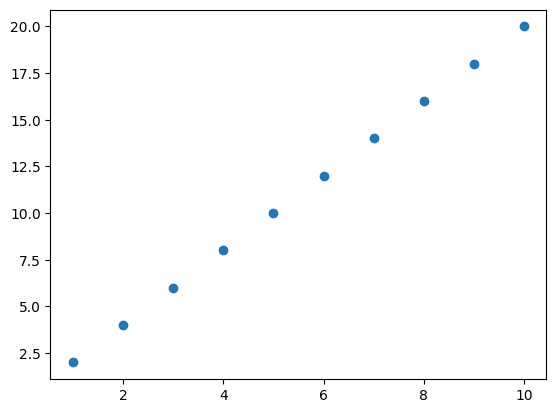

In [49]:
# Basic Regression Formulation using Numpy

a = np.array([1,2,3,4,5,6,7,8,9,10])
b= np.array([2,4,6,8,10,12,14,16,18,20])

# (y = 2x)
# For accessing we use x[0].ndim we gwt no dimensions as it is an array of scalar values and no dimensions
plt.scatter(a,b)
plt.show()

In [50]:
# Using Tensorflow or tensors

House_features = tf.constant(["Bedrooms","Bathrooms","Area"])
Price = tf.constant([74000])

print(House_features,Price)
print(f"Input Features Shape : {House_features.shape}")
print(f"Output Shape : {Price.shape}")

tf.Tensor([b'Bedrooms' b'Bathrooms' b'Area'], shape=(3,), dtype=string) tf.Tensor([74000], shape=(1,), dtype=int32)
Input Features Shape : (3,)
Output Shape : (1,)


# Converting numpy arrays to tensors

---



In [51]:
X = tf.constant(a)
y = tf.constant(b)

In [52]:
print(X,y)
print(f"Shape of X : {X.shape},  y : {y.shape}")
#But it is a regression probelm so we need X[] scalar value to predict a scalar value y[] respectively
print(X[1].shape) # void means 0 dimensions or scalar value

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int64) tf.Tensor([ 2  4  6  8 10 12 14 16 18 20], shape=(10,), dtype=int64)
Shape of X : (10,),  y : (10,)
()


### Steps for modelling a neural network

* Make the data into proper format after preprocessing and EDA
* One can also pick a model prebuilt or formulate through scratch using the steps (1) below

1. Create a model : Define input output and hidden layers
2. Compile the model : Define loss function and a optimizer function and evaluation matrix
3. Fitting a model : Letting our model try to generalize the predictions using X,y from training set
4. Evaluate the model : Evaluate on the testing dataset
5. Improve through Experimentation
6. Save and load the finetuned model

# Note :

This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

In [53]:
tf.random.set_seed(78)

# Defining the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 369ms/step - loss: 6.4260 - mae: 6.4260
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 6.1135 - mae: 6.1135
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 5.8010 - mae: 5.8010
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 5.4885 - mae: 5.4885
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 5.1760 - mae: 5.1760


In [54]:
y_pred = model.predict([12])

1/1 [==============================] - 0s 73ms/step


In [55]:
print(y_pred) # as mae us 5.192 we can say that y lies
print(y_pred-5.192,"<y<",y_pred+5.192)
#Which is still off thus we need to train more and tune the hyperparameters

[[13.32963]]
[[8.13763]] <y< [[18.52163]]


# Improving the model

Can be done by updating or altering the steps taken while creating a model

1. **Adding Layers to Model** : we can also change the number of neurons per layer , the activation function can also be altered to get the desired results

2. **Compiling The Model** : here we might change the optimization function or its learning rate

3. **Fitting The Model** We might fit the model with more iteration or epochs

# Lets try optimizing our last model

M1 )=> Increasing the epochs

In [56]:
# Defining the model
mod1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
mod1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
mod1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 752ms/step - loss: 6.8425 - mae: 6.8425
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5300 - mae: 6.5300
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2175 - mae: 6.2175
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 5.9050 - mae: 5.9050
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 5.5925 - mae: 5.5925
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 5.2800 - mae: 5.2800
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 4.9675 - mae: 4.9675
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 4.6550 - mae: 4.6550
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 4.3425 - mae: 4.3425
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 4.0300 - mae: 4.0300
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - los

In [57]:
y_pred = mod1.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close
print(y_pred-0.2786,"<y<",y_pred+0.2786)

1/1 [==============================] - 0s 76ms/step
predicted:[[23.546827]] 
actual :24
[[23.268227]] <y< [[23.825428]]


2. mod2)=> We will add a layer and change the oprtimization function

In [58]:
mod2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
mod2.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.1199),
             metrics = ["mae"])
mod2.fit(tf.expand_dims(X,axis = -1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 634ms/step - loss: 10.1770 - mae: 10.1770
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0815 - mae: 10.0815
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.9860 - mae: 9.9860
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8907 - mae: 9.8907
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7965 - mae: 9.7965
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7023 - mae: 9.7023
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6079 - mae: 9.6079
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5135 - mae: 9.5135
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4190 - mae: 9.4190
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3247 - mae: 9.3247
Epoch 11/100
1/1 [==============================] - 0s 11ms/step

In [59]:
y_pred = mod2.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close comparatively to the base model
print(y_pred-0.8084,"<y<",y_pred+0.8084)

1/1 [==============================] - 0s 184ms/step
predicted:[[23.74458]] 
actual :24
[[22.93618]] <y< [[24.552979]]


# Evaluating the model (flow)
```We basically have to "visualize visualize visualize" ```

1. One can visualize the data working upon
2. One can visualize the model which is built
3. One can visualize the accuracy of the predictions based on suitable metrics


# Lets Conider a non linear regression problem where suppose

# We need to predict the radiation levels faced by pilots and astraunots that can be used for predicting the risks of cancer


* sample_x : Be the altitidued in (Thousand feets)
* sample_y : Radiation levels

In [60]:
sample_X = tf.range(0,300,3)
print(sample_X)

tf.Tensor(
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207 210 213
 216 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261 264 267
 270 273 276 279 282 285 288 291 294 297], shape=(100,), dtype=int32)


In [61]:
sample_y= +25 - (3*sample_X) + (tf.math.square(sample_X))
print(sample_y)

tf.Tensor(
[   25    25    43    79   133   205   295   403   529   673   835  1015
  1213  1429  1663  1915  2185  2473  2779  3103  3445  3805  4183  4579
  4993  5425  5875  6343  6829  7333  7855  8395  8953  9529 10123 10735
 11365 12013 12679 13363 14065 14785 15523 16279 17053 17845 18655 19483
 20329 21193 22075 22975 23893 24829 25783 26755 27745 28753 29779 30823
 31885 32965 34063 35179 36313 37465 38635 39823 41029 42253 43495 44755
 46033 47329 48643 49975 51325 52693 54079 55483 56905 58345 59803 61279
 62773 64285 65815 67363 68929 70513 72115 73735 75373 77029 78703 80395
 82105 83833 85579 87343], shape=(100,), dtype=int32)


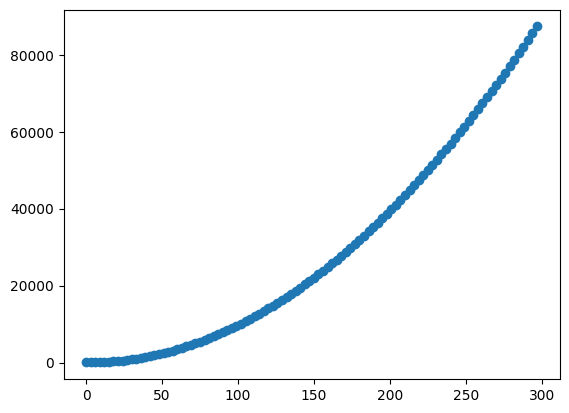

In [62]:
plt.scatter(sample_X,sample_y)

Splitting the data into train and test

In [63]:
X_train = sample_X[:70]
X_test = sample_X[70:]
y_train = sample_y[:70]
y_test = sample_y[70:]
print(f"{X_train}\n{X_test}\n\n")
print(f"{y_train}\n{y_test}")

[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207]
[210 213 216 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261
 264 267 270 273 276 279 282 285 288 291 294 297]


[   25    25    43    79   133   205   295   403   529   673   835  1015
  1213  1429  1663  1915  2185  2473  2779  3103  3445  3805  4183  4579
  4993  5425  5875  6343  6829  7333  7855  8395  8953  9529 10123 10735
 11365 12013 12679 13363 14065 14785 15523 16279 17053 17845 18655 19483
 20329 21193 22075 22975 23893 24829 25783 26755 27745 28753 29779 30823
 31885 32965 34063 35179 36313 37465 38635 39823 41029 42253]
[43495 44755 46033 47329 48643 49975 51325 52693 54079 55483 56905 58345
 59803 61279 62773 64285 65815 67363 68929 70513 72115 73735 75373 77029
 78703 80395 8210

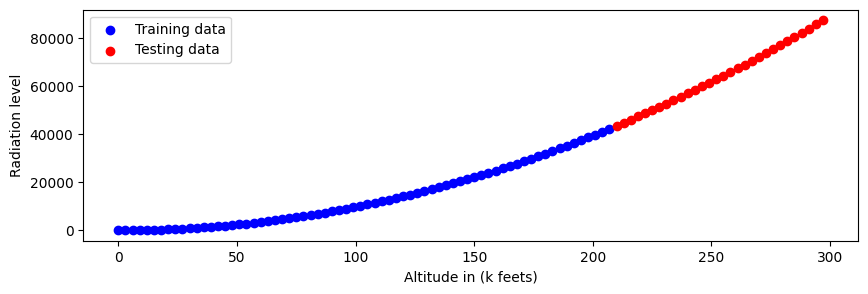

In [64]:
plt.figure(figsize = (10,3))
plt.scatter(X_train,y_train,c='b',label = "Training data")
plt.scatter(X_test,y_test,c='r',label = "Testing data")
plt.legend()
plt.xlabel("Altitude in (k feets)")
plt.ylabel("Radiation level");


In [74]:
# Crating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=300),
              metrics = ['mae'])
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 7ms/step - loss: 14098.4678 - mae: 14098.4678
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 14085.1045 - mae: 14085.1045
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 14066.3779 - mae: 14066.3779
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 14037.5918 - mae: 14037.5918
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 13988.3691 - mae: 13988.3691
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 13914.6094 - mae: 13914.6094
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 13794.4941 - mae: 13794.4941
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 13612.0264 - mae: 13612.0264
Epoch 9/1000
3/3 [==============================] - 0s 6ms/step - loss: 13340.8154 - mae: 13340.8154
Epoch 10/1000
3/3 [==============================] - 0s 6ms/step - loss: 12934.5820 - mae: 

In [75]:
model.summary() # we get it after building either by model.build() or model.fit()


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 100)               200       
                                                                 
 dense_90 (Dense)            (None, 100)               10100     
                                                                 
 dense_91 (Dense)            (None, 100)               10100     
                                                                 
 dense_92 (Dense)            (None, 100)               10100     
                                                                 
 dense_93 (Dense)            (None, 200)               20200     
                                                                 
 dense_94 (Dense)            (None, 1)                 201       
                                                                 
Total params: 50901 (198.83 KB)
Trainable params: 509